# Analis Exploratorio de Datos

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC # importación de modelo

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv/heart_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
#¿Que tipo de datos tiene el dataset?
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [0]:
#¿Tenemos nulos?
print(pd.isnull(df).sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [0]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [0]:
#Contamos la presencia de enfermedad cardíaca: 0 (sin presencia) y 1 (con presencia).
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

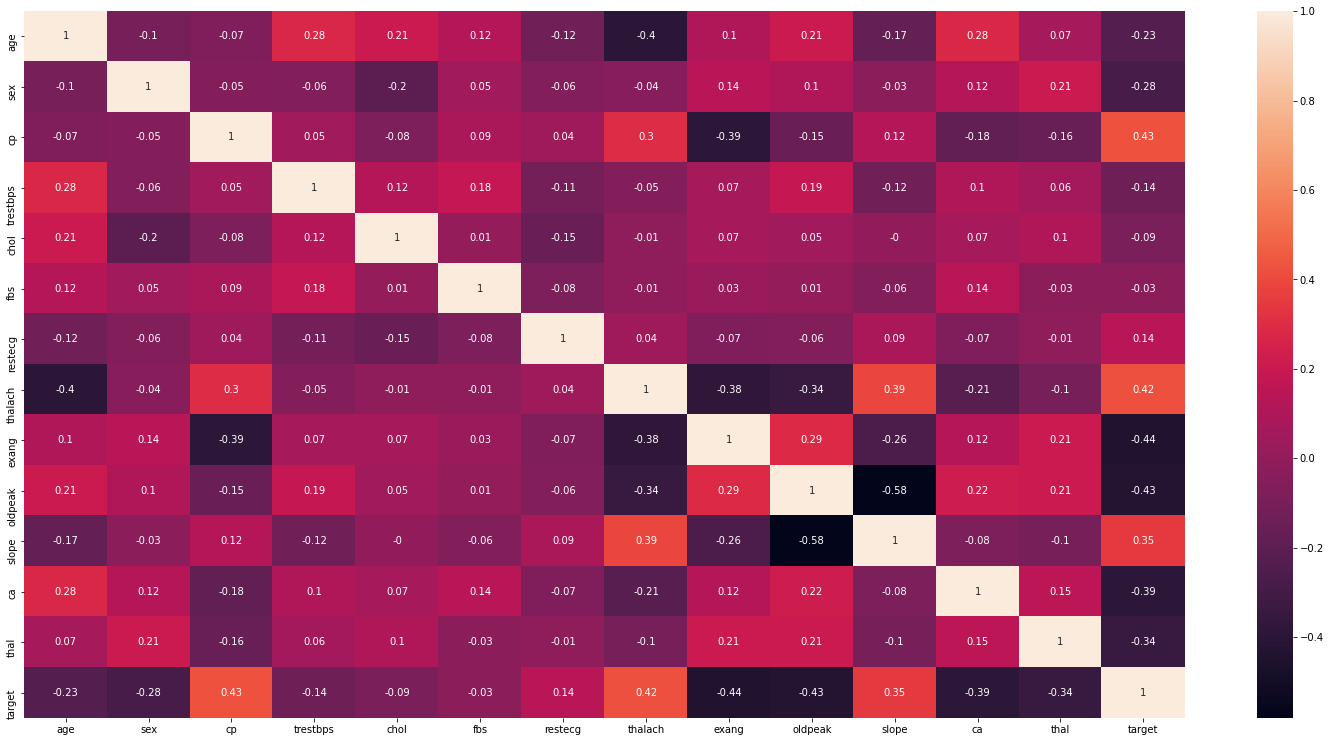

In [0]:
# creamos matriz de correlación
plt.figure(figsize = (26,13))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

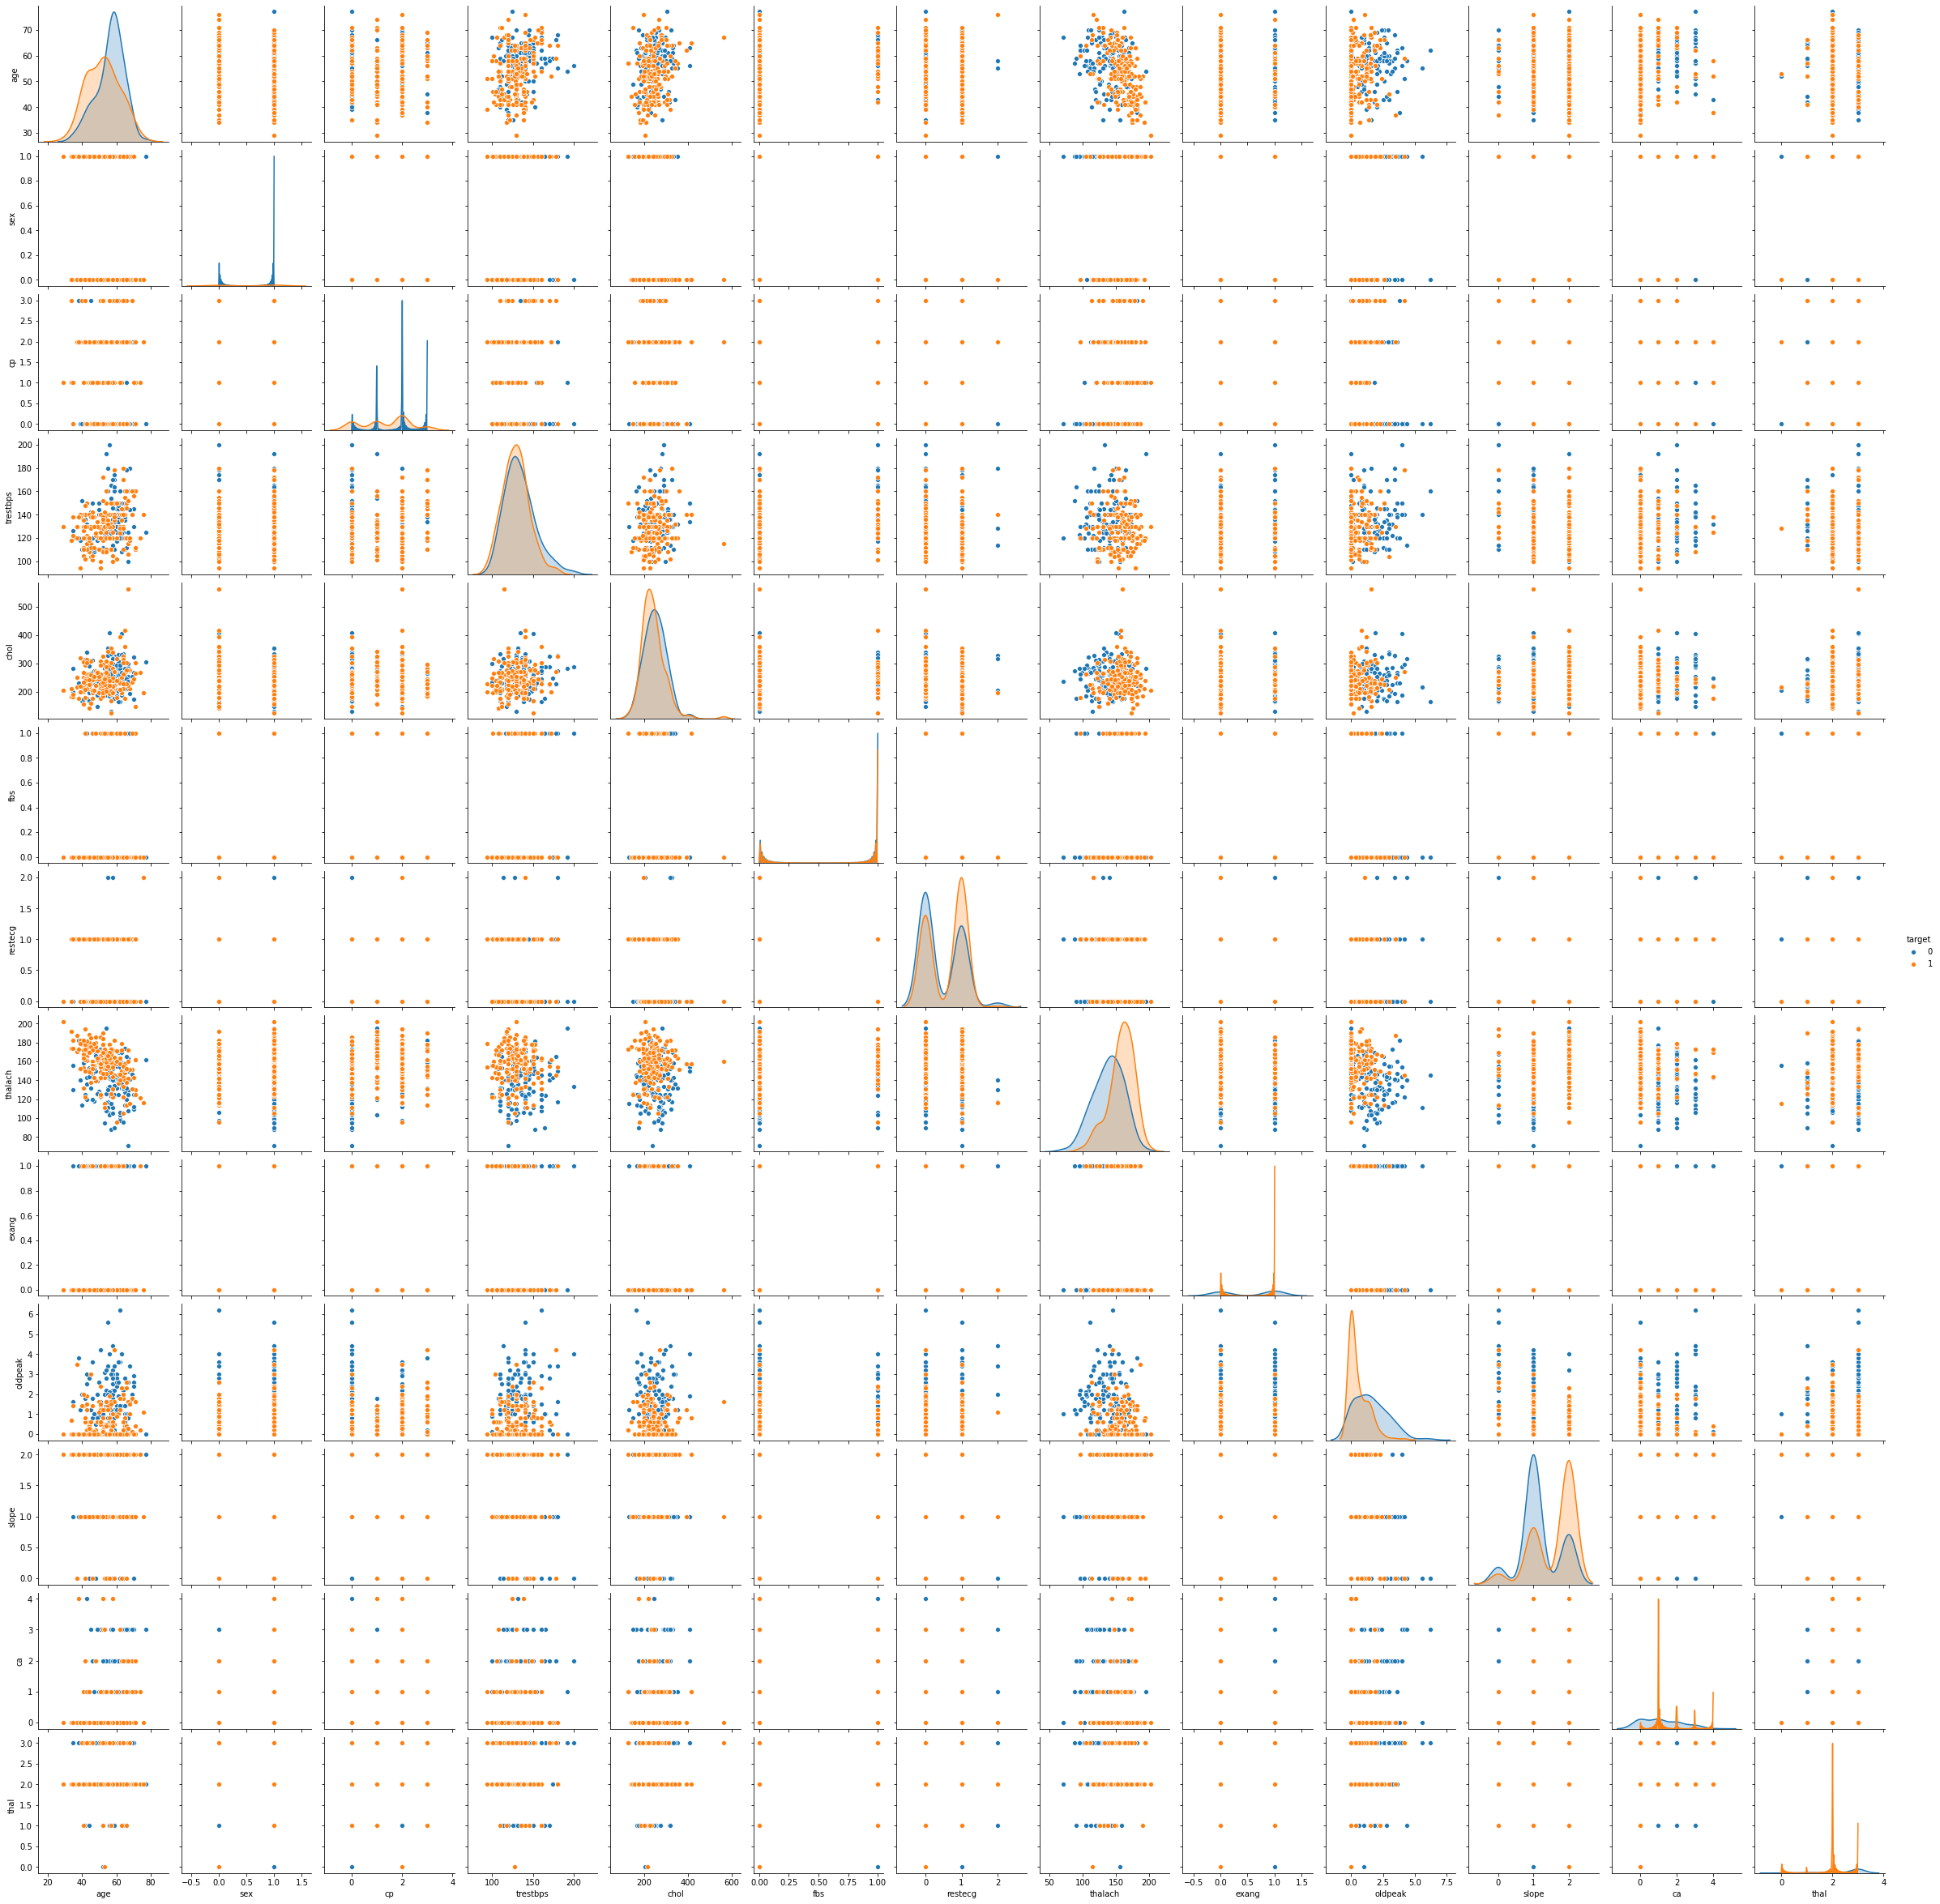

In [0]:
sns.pairplot(df, hue = 'target', vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [0]:
x = df.drop(['target'], axis=1)  # carga características a variable/dimensión/eje x
y = df['target']  # carga target a variable/dimensión/eje y

In [0]:
# dividimos el set de datos en subconjuntos de entrenamiento y test (75/25)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# crea modelo de tipo SVC, referencia: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc_model = SVC()

# entrena modelo con datos de entrenamiento
svc_model.fit(X_train, y_train)

# Obtiene resultados del modelo
svc_model.score(X_train, y_train)

0.6784140969162996

In [0]:
y_train

173    0
261    0
37     1
101    1
166    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 227, dtype: int64

In [0]:
predicciones = svc_model.predict(X_test)
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.71      0.45      0.56        33
           1       0.67      0.86      0.76        43

    accuracy                           0.68        76
   macro avg       0.69      0.66      0.66        76
weighted avg       0.69      0.68      0.67        76



In [0]:
df2 = pd.DataFrame({'Real': y_test, 'Predecido': svc_model.predict(X_test).flatten()})
df2

,Real,Predecido
225,0,0
152,1,1
228,0,1
201,0,0
52,1,1
...,...,...
46,1,1
160,1,1
232,0,0
181,0,0
